In [1]:
from pylab import *
from scipy.integrate import *

La caida libre con fricción, $f_{fric} = -\gamma |v|\hat v$, es:
$$
\ddot x = -\gamma v_x \\
\ddot y = -g -\gamma v_y
$$
o de manera equivalente
$$
\dot x = v_x \\
\dot v_x = -\gamma v_x \\
\dot y = v_y \\
\dot v_y = -g -\gamma v_y
$$

In [69]:
def caida(t,vec,g=9.81,gamma=0):
    d_vec = zeros_like(vec)
    # vec = x , vx , y , vy
    d_vec[0] = vec[1]
    d_vec[1] = -gamma*vec[1]
    d_vec[2] = vec[3]
    d_vec[3] = -g - gamma*vec[3]
    return d_vec

def suelo(t,vec,g=9.81,gamma=0):
    return vec[2]

In [126]:
tf = 2
ci = [0,0.5,2,0]
t = linspace(0,tf)
x_v = solve_ivp(caida,(0,tf),ci,args=(9.81,0.0,),dense_output=True,events=suelo)
x_v_f = solve_ivp(caida,(0,tf),ci,args=(9.81,0.3,),dense_output=True,events=suelo)
x_v.t_events[0][0]

0.6385508568141007

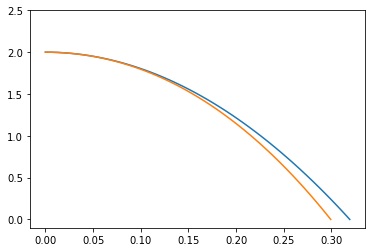

In [112]:
t = linspace(0,x_v.t_events[0][0])
x,vx,y,vy = x_v.sol(t)
plot(x,y)
t = linspace(0,x_v_f.t_events[0][0])
x,vx,y,vy = x_v_f.sol(t)
plot(x,y)
ylim([-0.1,2.5])
show()

In [206]:
def caida_rebote(ci,tf,g=9.81,fric=0,reb_tot=10):
    delta_t = 0.1
    x , y , t , reb , ti = array([]) , array([]) , array([]) , 0 , 0
    while reb <= reb_tot-1:
        x_v = solve_ivp(caida,(ti,tf),ci,args=(g,fric,),
                        dense_output=True,events=suelo)
        t_loc = arange(ti,x_v.t_events[0][-1],delta_t)
        t_loc = concatenate(( t_loc , array([x_v.t_events[0][-1]]) ))
        x_loc , vx_loc , y_loc , vy_loc = x_v.sol(t_loc)
        x , y = concatenate((x,x_loc)) , concatenate((y,y_loc))
        t = concatenate((t,t_loc))
        ci = [x_loc[-1] , vx_loc[-1] , y_loc[-1] , -vy_loc[-1]]
        ti = t[-1]
        reb += 1
    return t,x,y

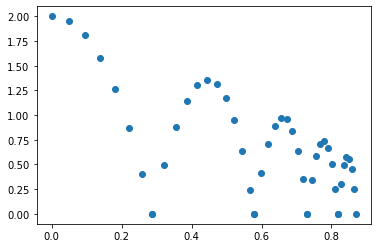

In [210]:
t,x,y = caida_rebote(ci,10,fric=0.5,reb_tot=5)
plot(x,y,'o')
show()

In [211]:
t

array([0.        , 0.1       , 0.2       , 0.3       , 0.4       ,
       0.5       , 0.6       , 0.67460036, 0.67460036, 0.77460036,
       0.87460036, 0.97460036, 1.07460036, 1.17460036, 1.27460036,
       1.37460036, 1.47460036, 1.57460036, 1.67460036, 1.72796038,
       1.72796038, 1.82796038, 1.92796038, 2.02796038, 2.12796038,
       2.22796038, 2.32796038, 2.42796038, 2.52796038, 2.6229717 ,
       2.6229717 , 2.7229717 , 2.8229717 , 2.9229717 , 3.0229717 ,
       3.1229717 , 3.2229717 , 3.3229717 , 3.4013473 , 3.4013473 ,
       3.5013473 , 3.6013473 , 3.7013473 , 3.8013473 , 3.9013473 ,
       4.0013473 , 4.09005207])